# Iris dataset Analysis

#### This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

#### Loading the dataset

In [50]:
import os
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
iris_data = datasets.load_iris()

# turn into dataframe
iris_df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target_names[iris_data.target]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [52]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [53]:
# display general stats
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
# number of data points for each class
iris_df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [55]:
# check if there are any null values
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

### Exploratory analysis

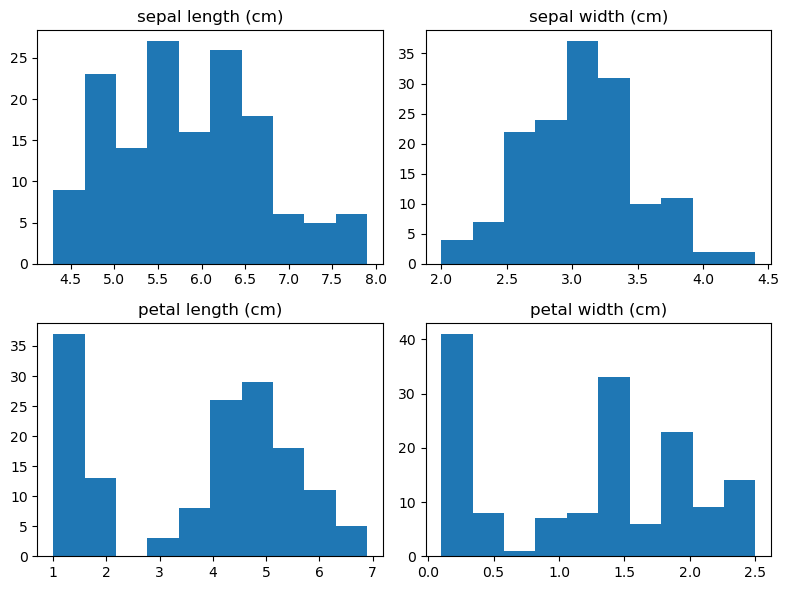

In [56]:
# display distribution of every measure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
for ix, axe in enumerate(axes.flat):
    axe.hist(iris_df.iloc[:, ix])
    axe.set_title(iris_df.columns[ix])

fig.tight_layout()
plt.show()

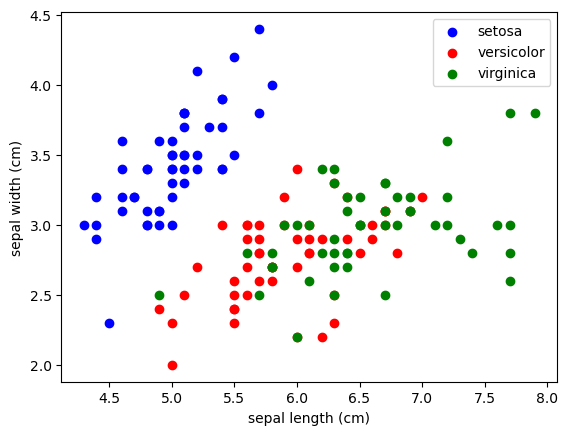

In [57]:
# scatter data points species : sepal length and width (2 first columns)
colors = ['blue', 'red', 'green']
for specie, color in zip(iris_df['species'].unique(), colors):
    data = iris_df[iris_df['species'] == specie]
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = color, label=specie)
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[1])
plt.legend()

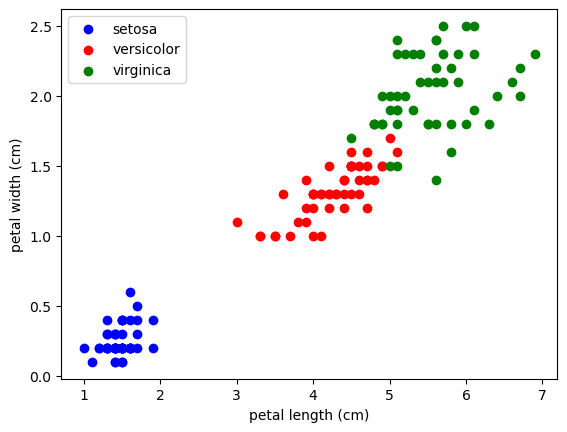

In [58]:
# scatter data points species : petal length and width (columns 2, 3)
colors = ['blue', 'red', 'green']
for specie, color in zip(iris_df['species'].unique(), colors):
    data = iris_df[iris_df['species'] == specie]
    plt.scatter(data.iloc[:, 2], data.iloc[:, 3], c = color, label=specie)
plt.xlabel(iris_df.columns[2])
plt.ylabel(iris_df.columns[3])
plt.legend()

We can observe a distinct separation between the three species in terms of petal dimension. We also observe larger dimension proximity between virginica and versicolor (both bigger petals in width and length).

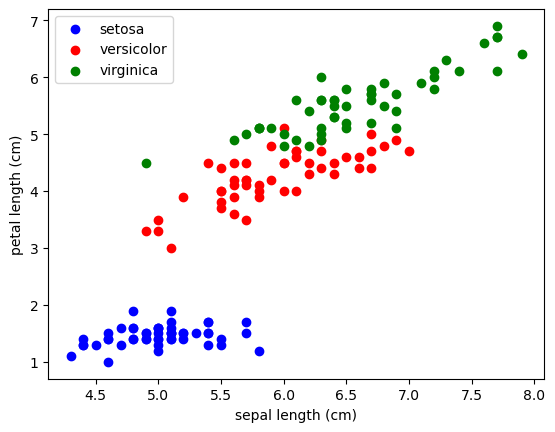

In [59]:
# let's scatter with only length measures (columns 0 and 2)
colors = ['blue', 'red', 'green']
for specie, color in zip(iris_df['species'].unique(), colors):
    data = iris_df[iris_df['species'] == specie]
    plt.scatter(data.iloc[:, 0], data.iloc[:, 2], c = color, label=specie)
plt.xlabel(iris_df.columns[0])
plt.ylabel(iris_df.columns[2])
plt.legend()

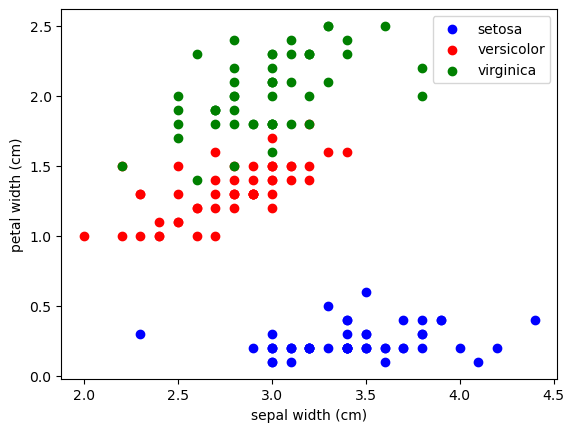

In [60]:
# let's scatter with only width measures (columns 1 and 3)
colors = ['blue', 'red', 'green']
for specie, color in zip(iris_df['species'].unique(), colors):
    data = iris_df[iris_df['species'] == specie]
    plt.scatter(data.iloc[:, 1], data.iloc[:, 3], c = color, label=specie)
plt.xlabel(iris_df.columns[1])
plt.ylabel(iris_df.columns[3])
plt.legend()

Let's see the possible relations between these 4 attributes with a correlation matrix.

In [61]:
import seaborn as sns

<AxesSubplot:>

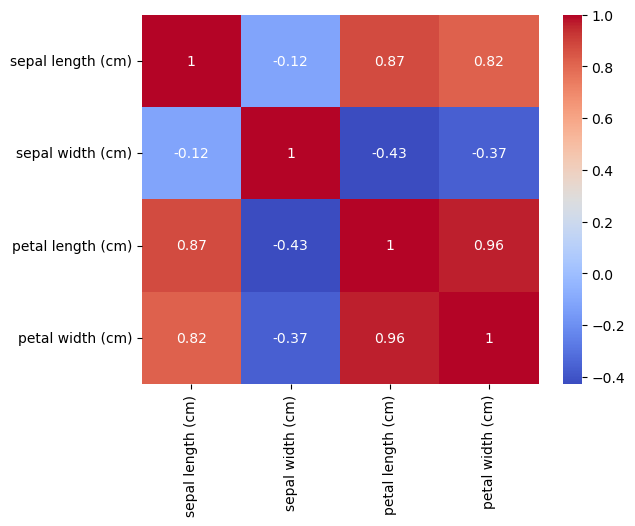

In [62]:
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')

### Class prediction / Model selection

In [63]:
# lets encode our categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
iris_df['species'] = label_encoder.fit_transform(iris_df['species'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [96]:
# let's split the data
from sklearn.model_selection import train_test_split
# 80 - 20 split
X = iris_df.drop(columns=['species'])
y = iris_df['species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

Based on our observations, we will try two simple models (we assume decision boundary on our data points is not complex) : a k nearest neighbor classifier and a decision tree.

In [105]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [106]:
print(f"Accuracy: {decision_tree.score(X_test, y_test)}")

Accuracy: 0.9


In [107]:
# K-NN classifier
from sklearn.neighbors import KNeighborsClassifier
k_nn = KNeighborsClassifier()
k_nn.fit(X_train, y_train)

KNeighborsClassifier()

In [108]:
print(f"Accuracy: {k_nn.score(X_test, y_test)}")

Accuracy: 0.9333333333333333


C:\Users\moham\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
